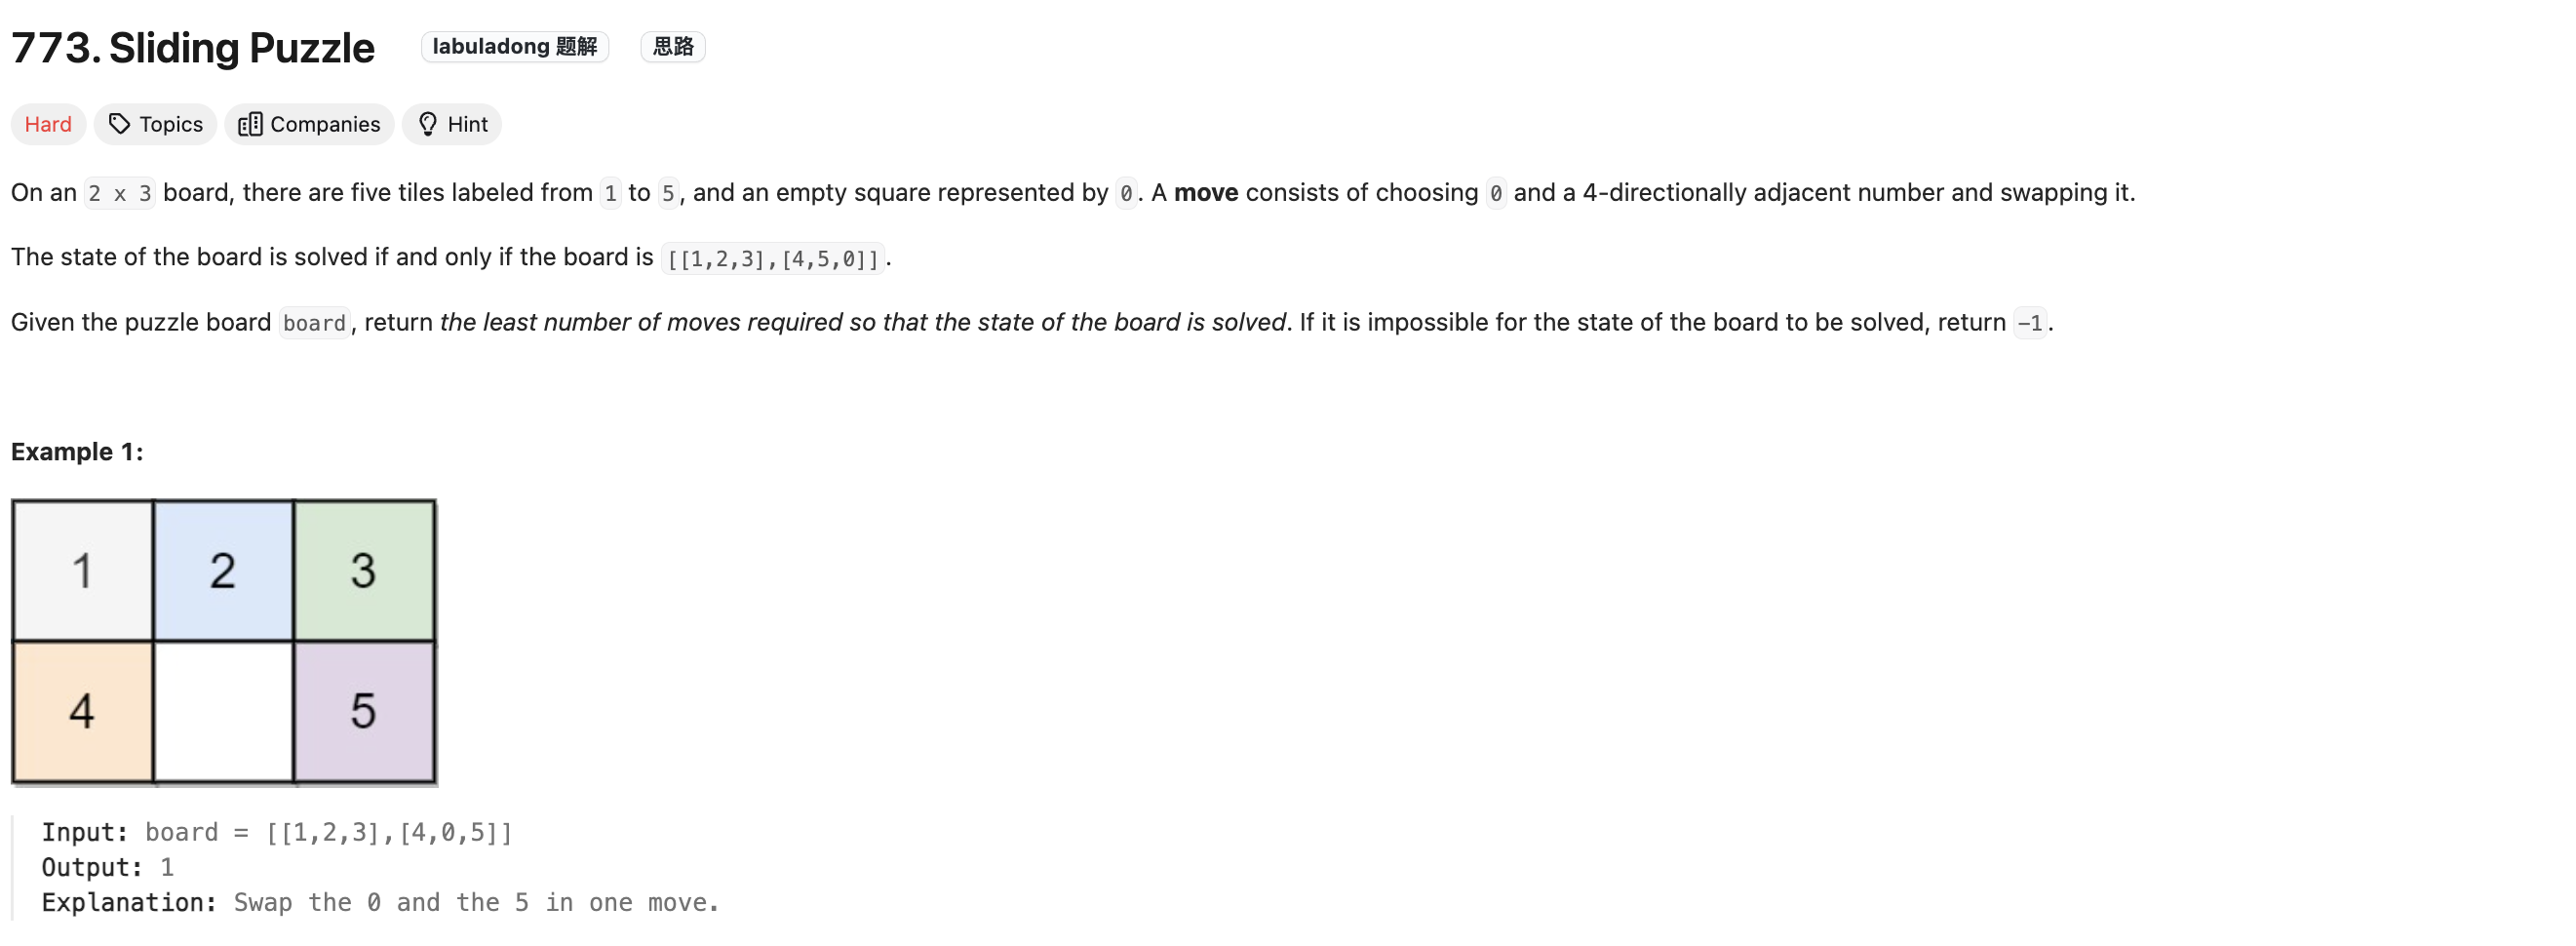

In [ ]:
from collections import deque
class Solution:
    def slidingPuzzle(self, board: List[List[int]]) -> int:
        target = "123450"
        board = self.boardToStr(board)
        print(board)
        if board == target:
            return 0
        
        visited = set()
        visited.add(board)

        q = deque([])
        q.append(board)
        step = 0

        while q:

            sz = len(q)

            for i in range(sz):
                cur = q.popleft()

                if cur == target:
                    return step
                
                for neighbor in self.getNeighbors(cur):
                    if neighbor not in visited:
                        q.append(neighbor)
                        visited.add(neighbor)
            step += 1
        return -1


    def getNeighbors(self, board: str):
        zero_index = board.index("0")
        neighbors = []
        swap_positions = {
            0: [1, 3],
            1: [0, 2, 4],
            2: [1, 5],
            3: [0, 4],
            4: [1, 3, 5],
            5: [2, 4]
        }
        # Get the indices where "0" can swap
        for swap_index in swap_positions[zero_index]:
            # Swap "0" with its neighbor and add to the neighbors list
            neighbors.append(self.swap(board, zero_index, swap_index))
        
        return neighbors
    def swap(self, board:str, i: int, j: int) -> str:
        # Convert the string to a list to allow swapping
        board_list = list(board)
        
        # Swap the characters at indices i and j
        board_list[i], board_list[j] = board_list[j], board_list[i]
        
        # Convert the list back to a string and return
        return ''.join(board_list)

    def boardToStr(self, board: List[List[int]]) -> str:
        res = ""

        for row in board:
            for element in row:
                res += str(element)
        return res